In [1]:
import pandas as pd
import os
import plotly.express as px

In [2]:
os.getcwd()

'C:\\Users\\Dell'

In [3]:
data = pd.read_csv("ipl 2022 data.csv")

In [4]:
data.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [6]:
data.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [7]:
# total No. of matches played by each team

data["team1"].value_counts()+data["team2"].value_counts()

Banglore      NaN
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan     NaN
Name: count, dtype: float64

In [8]:
total_matches_played = data["team1"].value_counts().add(data["team2"].value_counts(),fill_value=0)

In [9]:
total_matches_played

Banglore     16.0
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan    17.0
Name: count, dtype: float64

In [10]:
matches_won_by_each_team = data["match_winner"].value_counts()

In [11]:
matches_won_by_each_team

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

In [15]:
win_percentage_of_team = ((matches_won_by_each_team / total_matches_played)*100).sort_values(ascending = False).astype(int)

In [16]:
win_percentage_of_team

Gujarat      75
Lucknow      60
Rajasthan    58
Banglore     56
Delhi        50
Punjab       50
Hyderabad    42
Kolkata      42
Chennai      28
Mumbai       28
Name: count, dtype: int32

In [18]:
new_data = pd.DataFrame({'Total Matches Played' : total_matches_played,'Total Matches won' : matches_won_by_each_team,
'Win Percentage(%)':win_percentage_of_team }).sort_values(by= 'Win Percentage(%)',ascending= False)

In [19]:
new_data

,Total Matches Played,Total Matches won,Win Percentage(%)
Gujarat,16.0,12,75
Lucknow,15.0,9,60
Rajasthan,17.0,10,58
Banglore,16.0,9,56
Delhi,14.0,7,50
Punjab,14.0,7,50
Hyderabad,14.0,6,42
Kolkata,14.0,6,42
Chennai,14.0,4,28
Mumbai,14.0,4,28


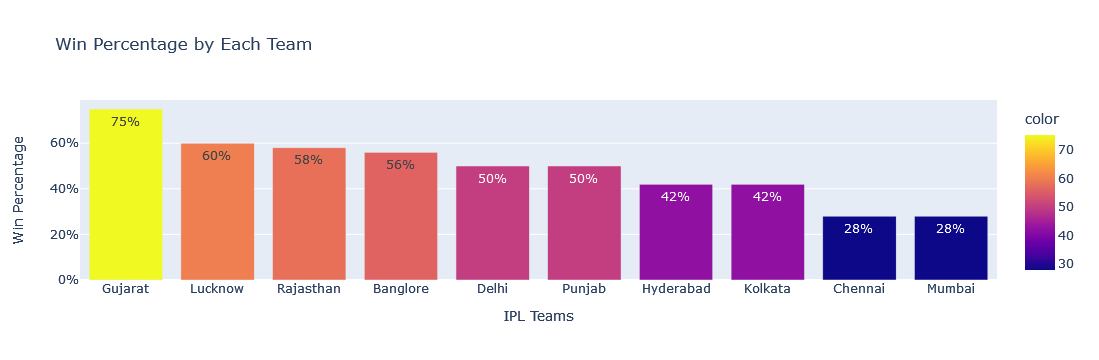

In [24]:
fig = px.bar(win_percentage_of_team,x=win_percentage_of_team.index,y = win_percentage_of_team,labels={'index':'IPL Teams','y':'Win Percentage'},
            title = 'Win Percentage by Each Team',text_auto=True,color=win_percentage_of_team).update_layout(yaxis_ticksuffix='%')
fig.show()

In [27]:
plyr_of_match = data.groupby('player_of_the_match')['match_id'].count().sort_values(ascending= False)

In [31]:
plyr_of_match[:10]

player_of_the_match
Kuldeep Yadav       4
Jos Buttler         3
Umesh Yadav         2
Rahul Tripathi      2
Shubman Gill        2
K L Rahul           2
Quinton de Kock     2
Jasprit Bumrah      2
Hardik Pandya       2
Yuzvendra Chahal    2
Name: match_id, dtype: int64

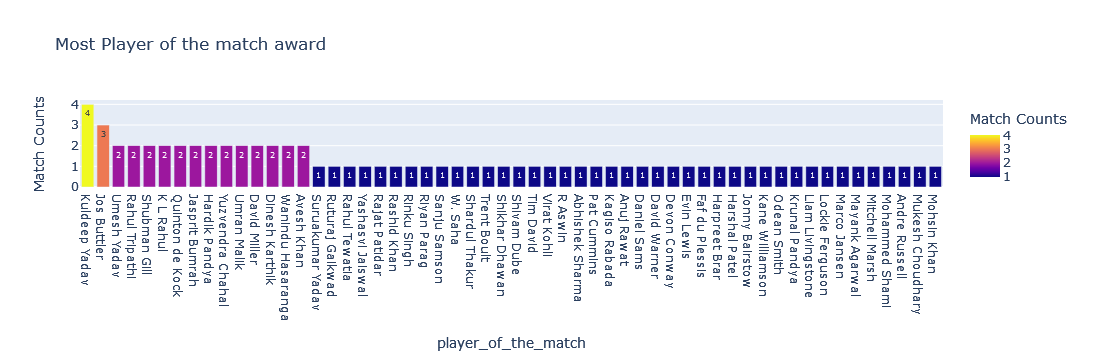

In [33]:
fig = px.bar(plyr_of_match,y='match_id',text='match_id',color='match_id',title="Most Player of the match award",labels={'match_id':'Match Counts'}
            ).update_traces(textfont_size=23)
fig.show()

In [35]:
top_scorer_of_tournament= data.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False)

In [37]:
top_scorer_of_tournament[:10]

top_scorer
Jos Buttler         651
Quinton de Kock     377
KL Rahul            351
Shubman Gill        288
Faf du Plessis      257
Liam Livingstone    239
David Warner        213
W. Saha             190
Ishan Kishan        180
Shikhar Dhawan      158
Name: highscore, dtype: int64

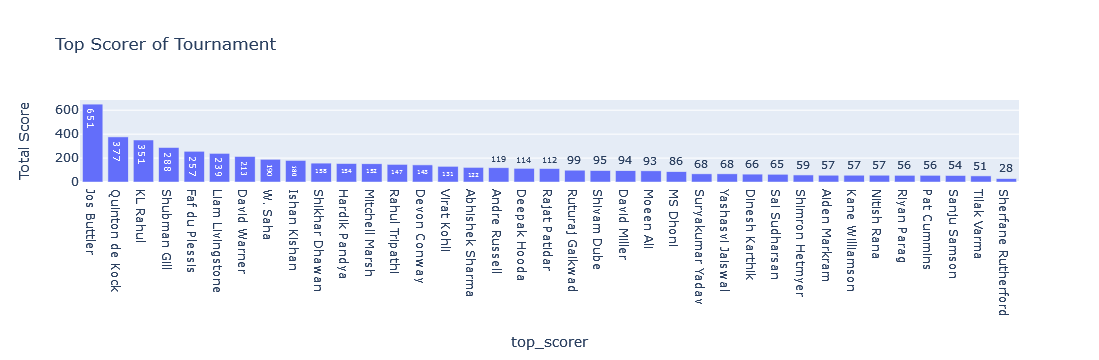

In [38]:
fig = px.bar(top_scorer_of_tournament,y='highscore',labels={'highscore':'Total Score'},title='Top Scorer of Tournament',text = 'highscore')
fig.show()

In [41]:
# count of toss win by each team
toss_win = data['toss_winner'].value_counts()


In [42]:
toss_win

toss_winner
Gujarat      10
Hyderabad    10
Mumbai        9
Kolkata       8
Delhi         8
Banglore      8
Lucknow       7
Chennai       6
Punjab        4
Rajasthan     4
Name: count, dtype: int64